# Focus and Intentions
*To start I want to go over my intentions with this lecture:*
 - I want to keep this lecture fairly brief as I intend to go over the the basics and the connections between them rather than spell out the chapter you already read. If you did not read it, no worries. I will still go over the topics in the book, just not as thorough. 
 - If you have any questions, feel free to interject. I want this to become more of a conversation, rather than a lecture so feel free to chime in.
 - If I say something wrong, have the wrong idea about anything, please feel free to correct me.
 - I'm going to take it section by section to make sure I'm touching on every area we read about. 
 - After we go over everything, let's discuss any feedback, questions, concerns, interesting topics, whatever you'd like. 

# Why Quantum Computing?
## Computational Complexity
 - Computational complexity: how algorithms increase in resource use as a problem size increases
     - This is displayed as time complexity and space complexity
     - As the size of an input increases:
         - how long does it take to finish the algorithm?
         - how much space does it take to finish the algorithm?
     - Imagine you have a black box where you give it a set of objects and it spits out a different color (really any output will do). It takes a certain amount of time to switch the colors, but the more objects you put in the box, the longer it will take. You have a box that when you put in a number of objects, n, it takes $2^n$ seconds to complete. So 5 objects will take $2^{5} = 32$ seconds.
     - Let's say you buy an even better box that is more efficient. It can change the color of $n$ objects in $n$ time. This means that it would only take 5 seconds to change those colors. Though the difference is not giant, the performance improvement becomes infinitely better as you increase the number of objects to infinity. All of this to say that an improvement in efficiency is infinitly important at scale. So these represent the algorithms growth rate. The algorithm is the black box, and the objects are the inputs into the algorithm. 

![image](https://miro.medium.com/v2/resize:fit:1053/1*kO69dq_xml2q3o2NH9OZ3g.png)


## What Quantum Offers and It's Limits
Quantum computers can offer these efficiency improvements from our classical computer algorithms.

The Qiskit Textbook discusses Shor's Factoring Algorithm, but I'd prefer to talk about Grover's Search Algorithm since it's something we will discuss later in the chapter. 

A classical computer can search through an unordered set of data in $O(n)$ time with linear search while Grover's search algorithm can search in $O(\sqrt n)$ time. 

Though we are not at that point yet with our quantum computers because we lack the number and reliability of qubits. We either lack the number of qubits to solve the problems or we don't have stable enough qubits to give us reliable results because of noise (or both!).

This may be a little too literal, but I think it's a comedic example of how outside variables affect our computing performance.  
https://www.youtube.com/watch?v=tDacjrSCeq4&ab_channel=BryanCantrill

# The Atoms of Computation
## Binary Values
Before going into qubit representation, it might be best to quickly gloss over classical bit representation. Our standard number system uses a base 10 numbering system where we move to the next digit when we hit 10. 
$$213 = 200 + 10 + 3$$  
$$(2 * 10^2) + (1 * 10^1) + (3 * 10^0)$$
Since computers would struggle to hold values like this, it's much easier to store a bunch of base 2 numbers in our classical computers with really tiny capacitors that hold the value, 1 or 0.
## Quantum Circuits
Quantum circuits look like sheet music. I was always confused as to why since all of the classical gates opened and closed their connections, but it's because quantum circuits cannot "fanin" or fanout." 
![image](https://siliconvlsi.com/wp-content/uploads/2023/08/Fan-In-and-Fan-Out.png)
A quantum state cannot be fanned out because of the no cloning theorem which prevents the cloning of a quantum state. Fanning in a quantum circuit would cause the circuit to break it's entanglement. Without fanning in or out, we get a circuit that looks like sheet music.

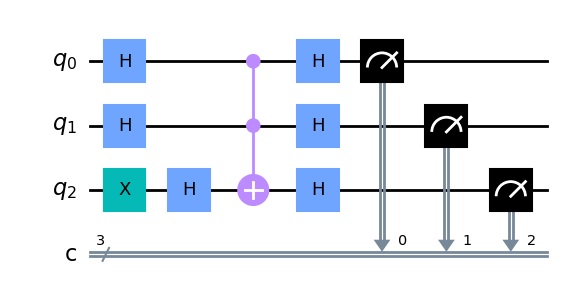

In [20]:
# import standard libraries
import qiskit
from qiskit.visualization import plot_bloch_multivector 
import numpy as np
import pylatexenc 
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

circuit = QuantumCircuit(3, 3)
circuit.x(2)
circuit.h(range(3))
circuit.ccx(0, 1, 2)
circuit.h(range(3))
circuit.measure(range(3), range(3))
display(circuit.draw('mpl'))

# What is Quantum?
The Qiskit textbook first talks about exploring qubits and introducing the Hadamard gate before discussing probabilities and why they matter in quantum computing. I'm going to try and take this from a slightly different angle and put a little more emphasis on the math. 

## Probabilities
We all at least know the basics of probability. Percent chances of things happening, fraction representation, probabilities adding up to 1 or 100%, etc. While classical probabilities give a liklihood of possible outcomes based on incomplete information, they fail to describe quantum phenomena. 

In quantum mechanics, probability amplitudes are used instead. These appear to be similar to standard probabilities, but seen with square roots, except they also possess a "phase", which can be understood as a hidden directional angle outside of the probabilities. Unlike traditional probabilities that are scalar real numbers, amplitudes are complex numbers. This allows amplitudes to exhibit "interference", where they can amplify or nullify each other, analogous to how positive and negative numbers might add up to either increase, decrease, or cancel out the total value.

## Hadamard Gate
Since we have already been through the standard representation of the Hadamard Gate within the book, let's move to the quantum statevector representation of the Hadamard Gate.  
*We will start with the state 0:*  
$\psi = |0\rangle$  
*Then we pass this state through the Hadamard gate and get this:  
$\psi = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle$  
*Lets factor this out to make it look cleaner:*  
$\psi = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)$  
*Lets pass it through once again and see what we get:*    
$\psi = \frac{1}{\sqrt2}((\frac{1}{\sqrt2}(|0\rangle + |1\rangle)) + (\frac{1}{\sqrt2}(|0\rangle - |1\rangle)))$  
*It looks like we got a negative phase from the |1> state going through the Hadamard gate on the second pass. This allows us to do some cancelling:*  
$\psi = \frac{1}{\sqrt2}(\frac{2}{\sqrt2}|0\rangle)$$   
$\psi = \frac{2}{2}(|0\rangle)$$   
$\psi = |0\rangle$  
*This completely explains the pattern we see when dealing with the Hadamard gate:*  
$H(|0\rangle) = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)$  
$H(|1\rangle) = \frac{1}{\sqrt2}(|0\rangle - |1\rangle)$  


# Describing Quantum Computers
The Qiskit textbook works to explain amplitudes without the use of complex numbers for the sake of simplicity. This forces us to only look at amplitudes facing forward and backward. Keep in mind that in the future, we will be using complex numbers to represent these amplitudes and instead represent a full range of motion. 

They introduce state vectors which is the representation of the quantum circuits state. There will be $2^n$ entries in this vector where n is the number of qubits.

$$
|\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle
$$

*So if this quantum circuit had both qubits going through a Hadamard gate, the state vector would look like this:*

$$
|\psi\rangle = \frac{1}{2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$

## Linear Algebra
### Scalars
Consider a vector:
$$
\mathbf{v} = 
\begin{bmatrix}
    v_1 \\
    v_2 \\
    v_3 \\
    v_4 \\
\end{bmatrix}
$$

If we multiply this vector by a scalar \( k \), the result is:
$$
k \cdot \mathbf{v} = 
\begin{bmatrix}
    k \cdot v_1 \\
    k \cdot v_2 \\
    k \cdot v_3 \\
    k \cdot v_4 \\
\end{bmatrix}
$$
So we can rethink the previous statevector as:
$$
\frac{1}{\sqrt2} 
\begin{bmatrix}
    v_1 \\
    v_2 \\
    v_3 \\
    v_4 \\
\end{bmatrix}
$$  

$$
=
\begin{bmatrix}
    \frac{1}{\sqrt2} v_1 \\
    \frac{1}{\sqrt2} v_2 \\
    \frac{1}{\sqrt2} v_3 \\
    \frac{1}{\sqrt2} v_4 \\
\end{bmatrix}
$$
### Vector Addition
Consider two vectors:
$$
\mathbf{a} = 
\begin{bmatrix}
    a_1 \\
    a_2 \\
    a_3 \\
    a_4 \\
\end{bmatrix}
$$

and

$$
\mathbf{b} = 
\begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4 \\
\end{bmatrix}
$$

The sum of these vectors, \( \mathbf{a} + \mathbf{b} \), is:
$$
\mathbf{a} + \mathbf{b} = 
\begin{bmatrix}
    a_1 + b_1 \\
    a_2 + b_2 \\
    a_3 + b_3 \\
    a_4 + b_4 \\
\end{bmatrix}
$$
## Vectors
If we were to treat our vectors as our basis for our vector space, also known as our computational basis, we would get a graph that looks like this.
![image](https://learn.qiskit.org/content/v2/intro/images/quantum-states/basis.svg)
The $|+\rangle$ and $|-\rangle$ that you see are the states produced by the Hadamard gate. These also can be treated as our computational basis if we'd like since they are orthogonal to one another. 
$$|+\rangle = \frac{1}{\sqrt2}(|0\rangle + |1\rangle)$$
$$|-\rangle = \frac{1}{\sqrt2}(|0\rangle - |1\rangle)$$
## Operations as Matrices
Operations like the Hadamard Gate can be represented as a matrix that will be multiplied (outer-product) by the state vector. This returns a new statevector that has passed through the gate:
$$
H = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
\end{bmatrix}
$$
Given the statevector:

$$
|\psi\rangle = 
\begin{bmatrix}
    \alpha \\
    \beta \\
\end{bmatrix}
$$

Multiplying it with the Hadamard matrix, we get:

$$
H |\psi\rangle = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
    \alpha \\
    \beta \\
\end{bmatrix}
=
\begin{bmatrix}
    \frac{\alpha + \beta}{\sqrt{2}} \\
    \frac{\alpha - \beta}{\sqrt{2}} \\
\end{bmatrix}
$$

Given the statevector with \( $\alpha$ = 1 \) and \( $\beta$ = 0 \):

$$
|\psi\rangle = 
\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
$$

Multiplying it with the Hadamard matrix, we get:

$$
H |\psi\rangle = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
=
\begin{bmatrix}
    \frac{1}{\sqrt{2}} \\
    \frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$

Given the statevector with \( $\alpha$ = 0 \) and \( $\beta$ = 1 \):

$$
|\psi\rangle = 
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}
$$

Multiplying it with the Hadamard matrix, we get:

$$
H |\psi\rangle = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}
=
\begin{bmatrix}
    \frac{1}{\sqrt{2}} \\
    -\frac{1}{\sqrt{2}} \\
\end{bmatrix}
$$
## Rules of Quantum Operations
Keep in mind that not all operations are valid, similar to state vectors. If an operation is multiplied by a valid state vector, it must output a valid state vector as well. 

# Entangled States
Entangled states can be a long and complex topic, but my intention is not to go too deeply into it.

Entangled states, as covered in the Qiskit textbook, are states that can't be achieved by another combination of basic states. For instance, there is not combination of basic states that can result in the state vector:
$$
\frac{1}{\sqrt2} 
\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    1 \\
\end{bmatrix}
$$
This is because the values must be dependent on one another to return the same value as eachother every time, they are correlated. 

We can achieve entangled states by controlled quantum gates like the CNOT gate. This is a gate with a control bit and a target bit. If the control bit is 1, it will flip the bit of the target bit (NOT or X gate). That is why it's called the controlled not gate. This is the gate that gives us the entanglement that we saw above. 

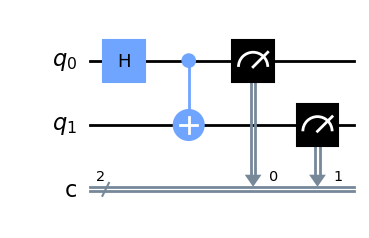

In [21]:
circuit.data = []
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure(range(2), range(2))
display(circuit.draw('mpl'))

{'11': 505, '00': 519}


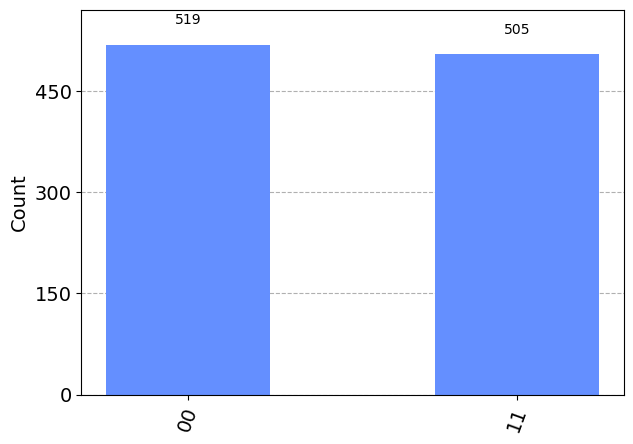

In [22]:
# simulate outputs
sim = AerSimulator()
compiled = transpile(circuit, sim)
job = assemble(compiled)

result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

The rest of this section I will skip since it goes into superdense coding and The Hardy paradox. If you're interested, I'd recommend searching them, but they would add a bit extra to this lecture. 

# Grover's Search Algorithm
I previously created a Grover Search Algorithm Jupyter Notebook, so instead of repeating what they have already said in the textbook, lets walk through my thought process and discoveries.
https://github.com/samabwhite/Grover-Search-Implementation